## Project: Creating Customer Segments
### Unsupervised Learning

## Getting Started


In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import warnings

warnings.simplefilter('ignore')

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("E:/SaMeH/Handsa/Machine Learning Nanodegree/Datasets/customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, I will begin exploring the data through visualizations and code to understand how each feature is related to the others. I will observe a statistical description of the dataset, considering the relevance of each feature, and select a few sample data points from the dataset which you I will track through the rest of this project.


In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, I'll add **three** indices of my choice to the `indices` list which will represent three customers to track. 

In [3]:
# Pick three indices of your choice you wish to sample from the dataset
indices = [10, 50, 22, 100, 400, 210, 110, 1]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3366,5403,12974,4400,5977,1744
1,6269,1095,1980,3860,609,2162
2,31276,1917,4469,9408,2381,4334
3,11594,7779,12144,3252,8035,3029
4,4446,906,1238,3576,153,1014
5,18567,1895,1393,1801,244,2100
6,11818,1648,1694,2276,169,1647
7,7057,9810,9568,1762,3293,1776


### Feature Relevance
In this section I'm going to look if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products?


In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Milk', axis = 1)
target = data['Milk']

# Split the data into training and testing sets(0.25) using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size = 0.25, random_state = 0 )

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state = 22)

regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
pred = regressor.predict(X_test)
score = r2_score(y_test, pred)


print("R^2 Score is: {}".format(score))

R^2 Score is: 0.38332100887545717


### Visualize Feature Distributions
In this section I'm going to implement scatter matrix in order to test the relvance bettween features and also to get intuition about the distripution of the data to make sure the data is normaly distriputed 

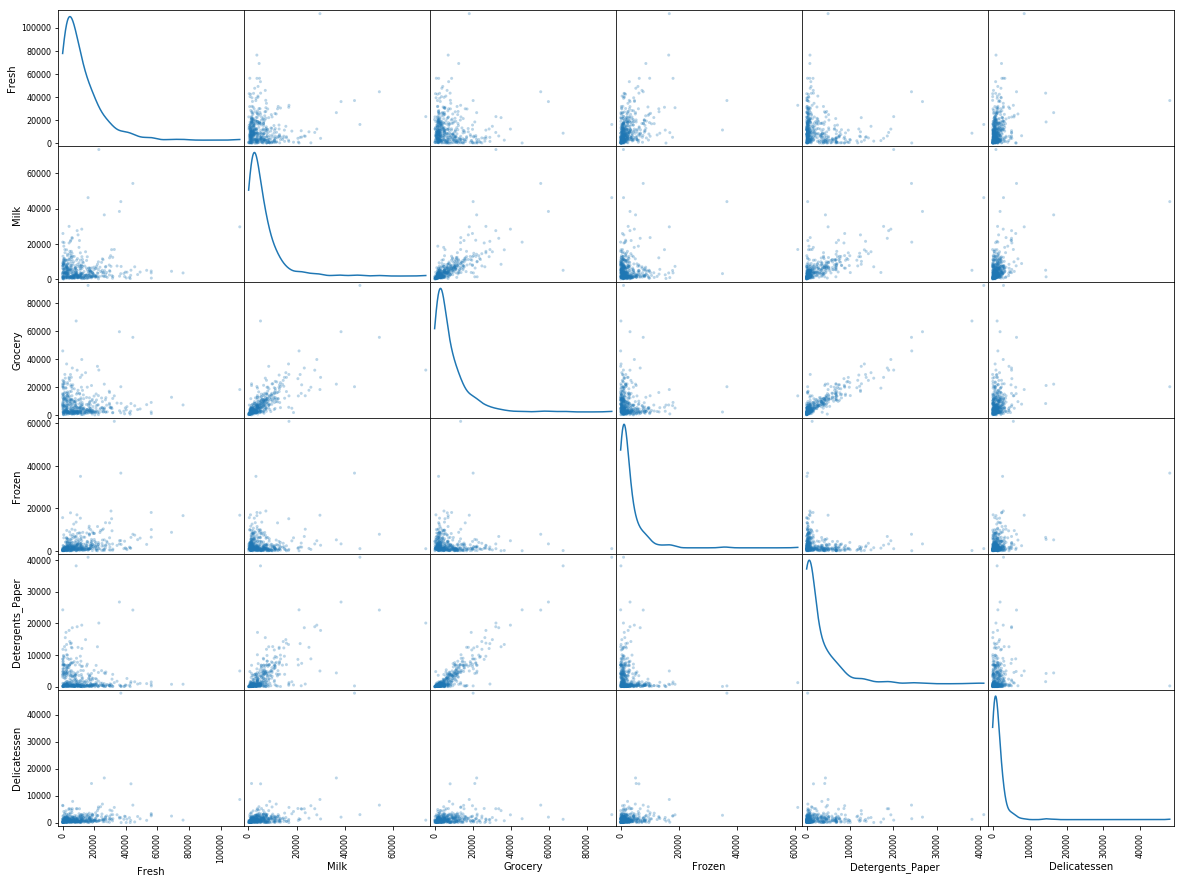

In [12]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (20,15), diagonal = 'kde');

## Data Preprocessing
In this section, I will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers.

### Feature Scaling
As we can conclude from the previous code cell(scatter plots) that the data is not normally distriputed(skewed), so In this section I'm going to apply `log-transformation` to get the data in the right distripution. 

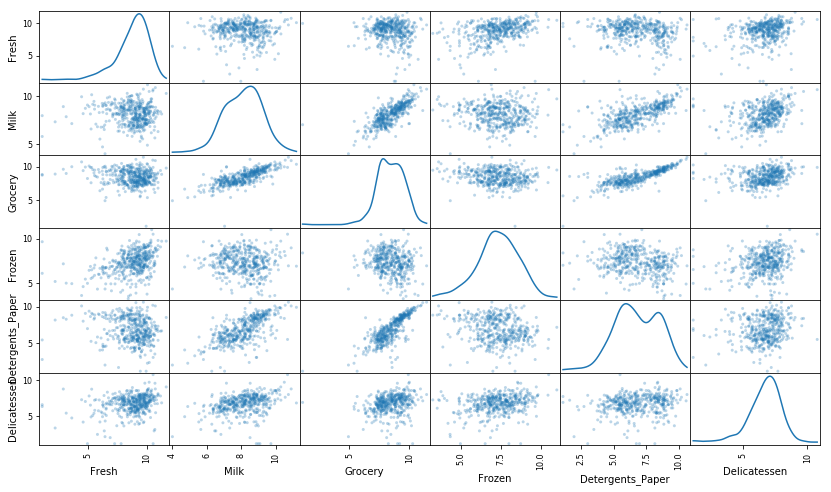

In [5]:
# Scale the data using the natural logarithm
log_data = data.apply(np.log)

# Scale the sample data using the natural logarithm
log_samples = samples.apply(np.log)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [6]:
log_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


### Conclusion:
From `describe` function above and the `pair scatter plots` we can see that we fixed the skewness issue that we have seen before so we can keep going now.

## Outlier Detection
The presence of outliers can often skew results. There are many techniques for how to detect and deal with the outliers in a dataset. *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

### Note: 
I'm not going to remove all outliers because this technique will result many outliers that removing them might affect the final result of the model.

In [8]:
# For each feature find the data points with extreme high or low values
#Fresh_df, Milk_df, Grocery_df, Frozen_df, Detergents_Paper_df, Delicatessen_df
for feature in log_data.keys():
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], q = 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], q = 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}' :".format(feature))
    display(log_data[((log_data[feature] <= Q1 - step) | (log_data[feature] >= Q3 + step))])
    
#Select the indices for data points you wish to remove
outliers  = [66, 75, 95, 109, 128, 142, 187, 218, 338]

    # Remove the outliers, if any were specified
good_data = log_data.drop(data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh' :


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk' :


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery' :


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen' :


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper' :


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen' :


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


## Feature Transformation
In this section I will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data.

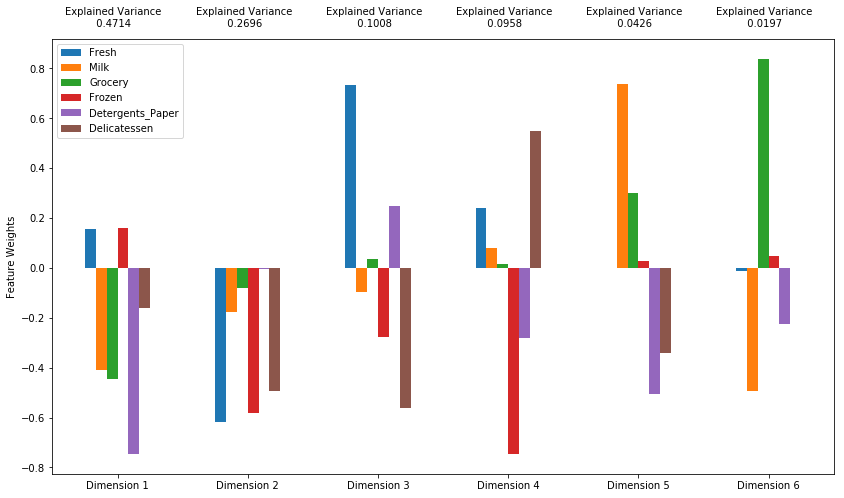

In [9]:
from sklearn.decomposition import PCA 

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 6).fit(good_data)

# Generate PCA results plot from visuals.py
pca_results = vs.pca_results(good_data, pca)

### Conclusion: 
* First and Second components have 74.1% variance of the total variance exist in the data.
* Fist four components have 93.76% variance of the total variance exist in the data.
* The first dimension has the higher variance among all dimensions, and next is the second and so on.
* The D1 most represented by **Detergents_Paper**
* The D2 most represented by **Fresh**
* The D3 most represented by **Fresh**
* The D4 most represented by **Frozen**
* The D5 most represented by **Milk**
* The D6 most represented by **Grocery**

### Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [10]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
reduced_data.head(10)

,Dimension 1,Dimension 2
0,-1.745318,0.262844
1,-1.809002,-0.761690
2,-1.921782,-1.573684
3,1.120413,-1.463888
4,-0.840410,-2.344624
5,-1.086638,-0.192467
6,-1.106662,0.463732
7,-1.585406,-0.835117
8,-0.839241,0.803970
9,-2.888835,-0.580249


### Observation
After running the code cell below we will see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions.

In [11]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.1093,-0.7484
1,1.1292,-0.7236
2,-0.1982,-2.7458
3,-2.3948,-1.6691
4,2.5025,-0.0180
5,1.7938,-1.0027
6,2.0438,-0.7300
7,-1.8090,-0.7617


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

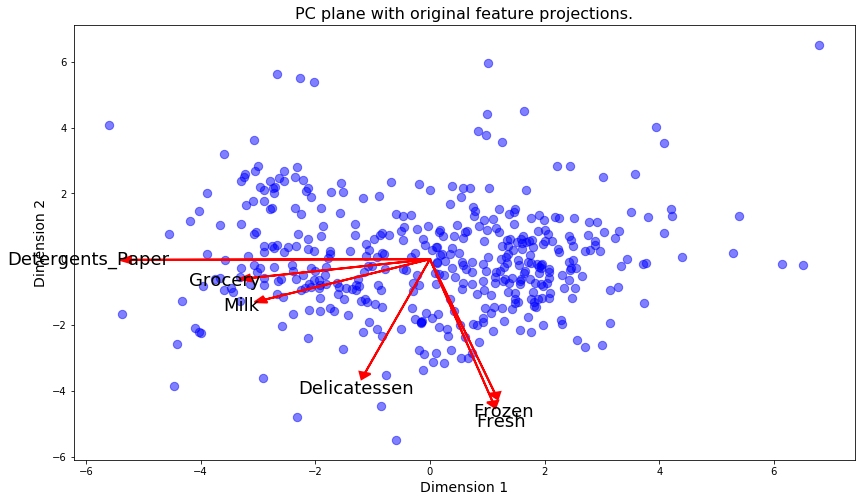

In [12]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

## Clustering

In this section, I will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. I will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

In [13]:
# Try GaussianMixture model first:

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def try_clusters(num_clusters):
    scores = []
    centers = []
    
    # Apply your clustering algorithm of choice to the reduced data 
    for c in num_clusters:
        
        clusterer = GaussianMixture(n_components = c, random_state = 42)
        clusterer.fit(reduced_data)

        # TODO: Predict the cluster for each data point
        preds = clusterer.predict(reduced_data)

        # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
        score = silhouette_score(reduced_data, preds)
        scores.append(score)
    return scores

In [15]:
Cs = [2, 3, 4, 5, 6, 7, 8, 9, 10]
scores = try_clusters(Cs)
result = sorted(zip(scores, Cs), reverse = True)

display(result)

[(0.4249405654379341, 2),
 (0.4047053731835716, 3),
 (0.37265778401470523, 4),
 (0.34615334867345404, 5),
 (0.33295523784470443, 10),
 (0.33117708509193333, 8),
 (0.33034561128137685, 9),
 (0.32890481659220244, 6),
 (0.30103611372250877, 7)]

In [17]:
# Try GaussianMixture model first:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def try_clusters(num_clusters):
    scores = []
    centers = []
    
    # Apply your clustering algorithm of choice to the reduced data 
    for c in num_clusters:
        
        clusterer = KMeans(n_clusters = c, random_state = 42)
        clusterer.fit(reduced_data)

        # TODO: Predict the cluster for each data point
        preds = clusterer.predict(reduced_data)

        # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
        score = silhouette_score(reduced_data, preds)
        scores.append(score)
    return scores

In [18]:
Cs = [2, 3, 4, 5, 6, 7, 8, 9, 10]
scores = try_clusters(Cs)
result = sorted(zip(scores, Cs), reverse = True)

display(result)

[(0.4277097020927955, 2),
 (0.36567792166993973, 7),
 (0.36549680596477246, 6),
 (0.35492154125778513, 9),
 (0.35330214640606433, 8),
 (0.35037427510141783, 5),
 (0.3474075550763626, 10),
 (0.3379174295073082, 3),
 (0.3292800881823313, 4)]

## Conclusion: 
There are slight differences in accuracies bettween `GaussianMixture` and `KMeans` so I will pick GaussianMixture (arbitrary), but the clear this to consider is that the two algorithms agree about the best number of clusters is `2` 

### Cluster Visualization
In this section I'm going to visualize the clusters exist in the dataset 

In [22]:
clust = GaussianMixture(n_components = 2).fit(reduced_data)

preds = clust.predict(reduced_data)
       
# Predict the cluster for each transformed sample data point
sample_preds = clust.predict(pca_samples)

#Get the cluster centers
centers = clust.means_

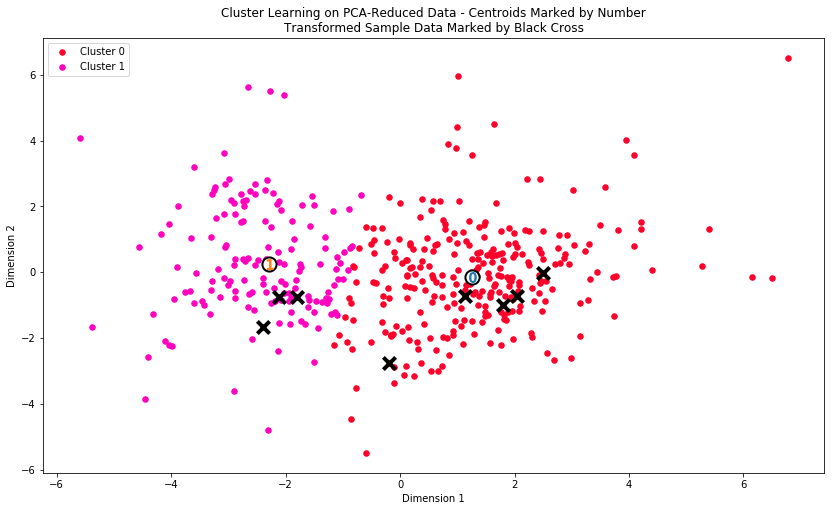

In [23]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

## Data Recovery
Each cluster present in the visualization above has a central point. These centers are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the `inverse transformations`.


In [25]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8832.0,2052.0,2679.0,1977.0,355.0,725.0
Segment 1,3976.0,8200.0,12656.0,886.0,4964.0,1057.0


### Conclusion:

From the statstics above and the total cost of each product category of each segments we can conclude that: 
* Customers from `Segment 0` pays higher than average on `(Fresh, Frozen)` products and close to average on `Delicatessen` products so this segment seems to be likely with **`Supermarkets`**
* Customers from `Segment 1` pays higher than average on `(Milk, Grocery, Detergents_Paper)` so this segment seems to be likely with **`Resturants`**